# SAT Scores in NYC 2011-2012

A total of 7 excel files that contain variable information about SAT scores in different regions of Newyork city that we are going to explore and clean to generate one clean master DataFrame to make it easier to perform data analytics.

Data available are:

- SAT scores by the school — SAT scores for each high school in New York City.
- School attendance — attendance information on every school in NYC.
- Math test results — math test results for every school in NYC.
- Class size — class size information for each school in NYC.
- AP test results — Advanced Placement exam results for each high school. Passing AP exams can get you college credit in the US.
- Graduation outcomes — the percentage of students who graduated and other outcome information.
- Demographics — demographic information for each school.
- School survey — surveys of parents, teachers, and students at each school.

## The Plan

1. Load each file and generate a dictionary that contains all tables.
2. Explore each excel file and get familiar with the variables. Look for common column that we can use to merge data based on it.
3. Clean each file. Remove unnecessary variables. Perform Aggravation, duplicate removal,
4. Merge cleaned data. Make sure to set the correct joins for each table.

### Step 1

- Import Numpy and Pandas packages.
- Loop through each data CSV file.
- Read the file into a Pandas DataFrame.
- Put each DataFrame into a Python dictionary.
- Explore the dictionary

In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
files = ['math_test_results.csv', 'ap_2010.csv', 'class_size.csv', 'demographic.csv',
         'graduation.csv', 'sat_results.csv']

data = {}
for f in files:
    d = pd.read_csv('{0}'.format(f))
    data[f.replace('.csv', '')] = d

### Adding in the Surveys data

Survey data consist of two big files contain many columns. The few first columns represent the state evaluation of each school, and the rest describe students' parents' evaluation. 
We are going to load the data into the project, then drop unnecessary columns and finally add this table to the main dictionary.

In [491]:
survey1 = pd.read_excel('survey_all.xlsx', sheet_name='Sheet1', header =2)
survey2 = pd.read_excel('survey_75.xlsx', sheet_name='Sheet1', header =2)
survey = pd.concat ([survey1, survey2], axis=0)

In [493]:
print (survey1.shape)
print (survey2.shape)
print (survey.shape)
print (survey.columns)

(1646, 1937)
(56, 1768)
(1702, 2768)
Index(['dbn', 'schoolname', 'rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p',
       'nr_s', 'nr_t',
       ...
       's_q14_2', 's_q14_3', 's_q14_4', 's_q14_5', 's_q14_6', 's_q14_7',
       's_q14_8', 's_q14_9', 's_q14_10', 's_q14_11'],
      dtype='object', length=2768)


In [494]:
survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:, survey.columns.isin(survey_fields)]
data["survey"] = survey
survey.shape

(1702, 23)

### Step 2

- Explore each Table and get familiar with the variables.
- Identify a common column we can use to merge files based on it.
- Build a mutual column when it's missing in one or more DataFrame.


In [495]:
"""Reading the Header of each Data Frame"""

for k,v in data.items(): 
    print ("\n" + k + "\n")
    print (v.head())


math_test_results

      DBN Grade  Year      Category  Number Tested  Mean Scale Score  \
0  01M015     3  2006  All Students             39             667.0   
1  01M015     3  2007  All Students             31             672.0   
2  01M015     3  2008  All Students             37             668.0   
3  01M015     3  2009  All Students             33             668.0   
4  01M015     3  2010  All Students             26             677.0   

   Level 1 #  Level 1 %  Level 2 #  Level 2 %  Level 3 #  Level 3 %  \
0        2.0        5.1       11.0       28.2       20.0       51.3   
1        2.0        6.5        3.0        9.7       22.0       71.0   
2        0.0        0.0        6.0       16.2       29.0       78.4   
3        0.0        0.0        4.0       12.1       28.0       84.8   
4        6.0       23.1       12.0       46.2        6.0       23.1   

   Level 4 #  Level 4 %  Level 3+4 #  Level 3+4 %  
0        6.0       15.4         26.0         66.7  
1        4.0    

We can see that column `DBN` appears in almost all DataFrame, which makes it an excellent candidate for merging the data. 

If we look at the `Class Size` table, `DBN` is missing in this table. However, it seems like `DBN` is a combination of other columns like `CSD`, `Borough`, and `School Code`. 

We will generate a `DBN` column so we can use it to merge the `Class Size` table with other tables.

In [496]:
data["demographic"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

In [497]:
data["class_size"].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


In [498]:
data["class_size"]['DBN'] = data["class_size"].apply (lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
cols =data["class_size"].columns.tolist()
cols = cols[-1:] + cols[:-1]
data["class_size"] = data["class_size"][cols]
data["class_size"].head(3)

,DBN,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M015,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,01M015,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,01M015,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


In [499]:
class_size = data["class_size"]
class_size = class_size[class_size['PROGRAM TYPE']=='GEN ED']
class_size =class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
class_size.drop(['CSD', 'SCHOOLWIDE PUPIL-TEACHER RATIO'], axis=1, inplace=True)
data['class_size'] = class_size
class_size.head(10)

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS
0,01M015,19.333333,1.166667,17.166667,17.000000,17.333333
1,01M019,33.833333,1.666667,20.583333,20.000000,21.166667
2,01M020,66.166667,3.000000,22.400000,21.000000,23.500000
3,01M034,38.153846,1.692308,21.553846,21.384615,21.846154
4,01M063,13.666667,1.000000,13.666667,13.666667,13.666667
5,01M064,21.400000,1.000000,21.400000,21.400000,21.400000
6,01M110,42.500000,1.833333,23.583333,21.666667,25.500000
7,01M134,49.333333,2.500000,20.133333,18.166667,22.000000
8,01M137,28.500000,1.500000,19.250000,18.166667,20.333333
9,01M140,65.384615,2.384615,26.246154,25.461538,27.384615


### Step 3

- Perform data trimming and cleaning. 
- Remove unnecessary variables.
- Perform Aggravation, duplicate removal. 



We will start with the `Demographics` Table. The demographic table contains the demographic distribution for each student for multiple years. We are going to keep only 2011-2012 year and drop some unuseful columns

In [550]:
len(data["demographic"]['total_enrollment'].unique())

842

In [501]:
demographics = data["demographic"]
demographics = demographics[demographics["schoolyear"] == 20112012]
demographics.drop('fl_percent', axis=1, inplace=True)
data["demographic"] = demographics

C:\Users\Fahad\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Next `Math Test Results` We can see for each school there are set of test scores for each year and grad. Again we will choose the year 2011. Also, we have decided to focus our project scope of the Eighth Grade.

In [502]:
data["math_test_results"].head(5)

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667.0,2.0,5.1,11.0,28.2,20.0,51.3,6.0,15.4,26.0,66.7
1,01M015,3,2007,All Students,31,672.0,2.0,6.5,3.0,9.7,22.0,71.0,4.0,12.9,26.0,83.9
2,01M015,3,2008,All Students,37,668.0,0.0,0.0,6.0,16.2,29.0,78.4,2.0,5.4,31.0,83.8
3,01M015,3,2009,All Students,33,668.0,0.0,0.0,4.0,12.1,28.0,84.8,1.0,3.0,29.0,87.9
4,01M015,3,2010,All Students,26,677.0,6.0,23.1,12.0,46.2,6.0,23.1,2.0,7.7,8.0,30.8


In [503]:
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']
data["math_test_results"].drop('Category', axis=1, inplace =True)
data["math_test_results"].head(5)

,DBN,Grade,Year,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
111,01M034,8,2011,48,646.0,15.0,31.3,22.0,45.8,11.0,22.9,0.0,0.0,11.0,22.9
280,01M140,8,2011,61,665.0,1.0,1.6,43.0,70.5,17.0,27.9,0.0,0.0,17.0,27.9
346,01M184,8,2011,49,727.0,0.0,0.0,0.0,0.0,5.0,10.2,44.0,89.8,49.0,100.0
388,01M188,8,2011,49,658.0,10.0,20.4,26.0,53.1,10.0,20.4,3.0,6.1,13.0,26.5
411,01M292,8,2011,49,650.0,15.0,30.6,25.0,51.0,7.0,14.3,2.0,4.1,9.0,18.4


Next is the `Graduation` data. We are setting Cohort to `2006` which is the first year of our graduates and the demographics to `Total Cohort`

In [504]:
data["graduation"].head(5)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [505]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

data["graduation"].head(5)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


Finally, if we look at `SAT Results` data we can see that we don't have the total SAT score, but we have columns `SAT Math`, `SAT Writing`, `SAT Reading`, which we can sum to get the total

In [506]:
data['sat_results'].head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,08X408,HERBERT H. LEHMAN YABC,6,402,373,413
1,28Q338,QUEENS SATELLITE HIGH SCHOOL FOR OPPORTUNITY,6,403,408,367
2,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
3,06M457,GEORGE WASHINGTON YABC,7,394,357,346
4,17K489,W.E.B. DUBOIS ACADEMIC HIGH SCHOOL,7,394,364,334


In [540]:
cols = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']

for i in cols:
    data['sat_results'][i] = pd.to_numeric(data['sat_results'][i], errors='coerce')

    data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

### Lets have a look at the data and see how it's look like now!

In [529]:
for k,v in data.items():
    print(k)
    print(v.head())

math_test_results
        DBN Grade  Year  Number Tested  Mean Scale Score  Level 1 #  \
111  01M034     8  2011             48             646.0       15.0   
280  01M140     8  2011             61             665.0        1.0   
346  01M184     8  2011             49             727.0        0.0   
388  01M188     8  2011             49             658.0       10.0   
411  01M292     8  2011             49             650.0       15.0   

     Level 1 %  Level 2 #  Level 2 %  Level 3 #  Level 3 %  Level 4 #  \
111       31.3       22.0       45.8       11.0       22.9        0.0   
280        1.6       43.0       70.5       17.0       27.9        0.0   
346        0.0        0.0        0.0        5.0       10.2       44.0   
388       20.4       26.0       53.1       10.0       20.4        3.0   
411       30.6       25.0       51.0        7.0       14.3        2.0   

     Level 4 %  Level 3+4 #  Level 3+4 %  
111        0.0         11.0         22.9  
280        0.0         17.0   

In [530]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
for i, f in enumerate(flat_data[:]):
    name = flat_data_names[i]
    print(name)
    print('shape(',len(f['DBN']), ',', len(f.columns), ')')

math_test_results
shape( 499 , 15 )
ap_2010
shape( 258 , 5 )
class_size
shape( 1481 , 6 )
demographic
shape( 1509 , 37 )
graduation
shape( 405 , 23 )
sat_results
shape( 421 , 7 )
survey
shape( 1702 , 23 )


## Step 4

Merge cleaned data. Make sure to set the correct joins for each table.

By looking at the trimmed DataFrames, it's obvious they are not equal in size. Unfortunately, essential tables such as `SAT test` and `Math results` don't have all the school's information; hence we have to be careful with choosing the correct join for each table (inner or outer).

We have chosen Outer join for following DataFrames because they have the crucial information about SAT test:
`math_test_results`,`sat_results`, `graduation`, `ap_2010`
While other DataFrames contain information of minor importance compared to the first group, so we have chosen inner join to keep only the information about the schools of interest.

Finally, we will convert all the information from `Str` to `numeric` to perform such basic data visualization and analysis.

In [563]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
full = flat_data[0]
# full = full.merge(flat_data[1], on="DBN", how='outer')
# full = full.merge(flat_data[4], on="DBN", how='outer')
# full = full.merge(flat_data[5], on="DBN", how='outer')

for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    if name not in ['sat_results', 'graduation', 'ap_2010']:
        full = full.merge(f, on="DBN", how='inner')
    else:
        full = full.merge(f, on="DBN", how='outer')
full.shape

(819, 110)

In [564]:
len(full['total_enrollment'].unique())

503

In [557]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    full[col] = pd.to_numeric(full[col], errors='coerce')
    full[cols] = full[cols].fillna(value=0)
full['school_dist'] = full['DBN'].apply(lambda x: x[:2])
full = full.fillna(full.mean())

## Data Correlation

A quick look at the relation between SAT Score and other variables gives us exciting observations.

- Total enrollment correlates strongly with sat_score.
- Schools' females' percentage (female_per) correlates positively with SAT score, whereas males percentage (male_per) correlates negatively.
- None of the survey responses correlate highly with SAT scores.
- There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
- English learner percent correlates strongly negatively with SAT scores.

In [558]:
full.corr()['sat_score']

Year                     NaN
Number Tested       0.031537
Mean Scale Score    0.314425
Level 1 #          -0.087047
Level 1 %          -0.259078
                      ...   
aca_s_11            0.128971
saf_tot_11          0.154245
com_tot_11          0.071938
eng_tot_11          0.082187
aca_tot_11          0.118874
Name: sat_score, Length: 79, dtype: float64

We can see below. Most of the schools have an average total enrollment of around 500 students and their SAT scores ranging between 1000 and 2000. Also, there is a slight positive correlation between the total number of enrollments and SAT scores.

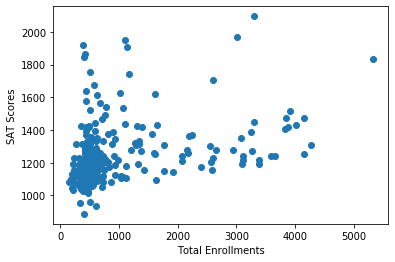

In [565]:
def plot (x, y, xlabel, ylabel):    
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
plot(full['total_enrollment'],full['sat_score'], 'Total Enrollments', 'SAT Scores')

We can see also, English learner score is lower than their colleagues. The higher their percentage the lower the school SAT scores.

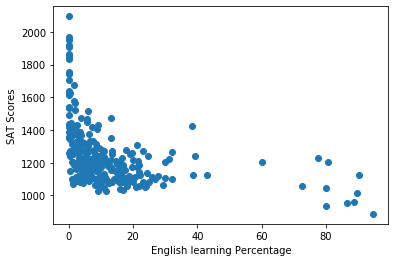

In [566]:
plot(full['ell_percent'], full['sat_score'], 'English learning Percentage','SAT Scores' )

### survey scores vs. SAT scores

When we compute the degree of correlation between SAT score and survey score of each evaluation group, surprisingly highest correlation degrees are parent group and student group. on the opposite side, teachers scored the lowest correlation 

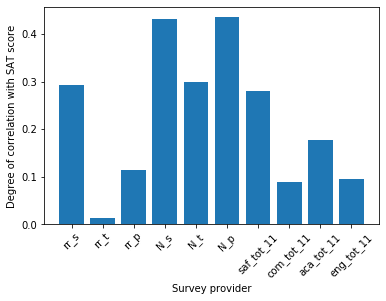

In [567]:
score =full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]]

plt.bar(["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"], score)
plt.xticks(rotation=45)
plt.xlabel('Survey provider')
plt.ylabel('Degree of correlation with SAT score')
plt.show()

### Race vs. SAT Score

The higher the percentages of white and Asian students, the higher the SAT score. Parallelly the higher the Black and Hispanic students percentages, the lower the SAT score for a given school

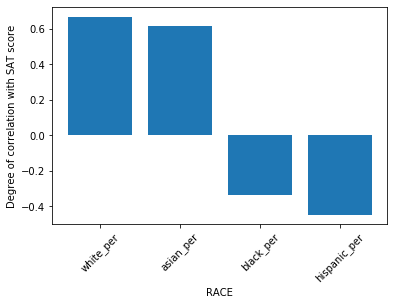

In [568]:
score2=full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]]
plt.bar(["white_per", "asian_per", "black_per", "hispanic_per"], score2)
plt.xticks(rotation=45)
plt.xlabel('RACE')
plt.ylabel('Degree of correlation with SAT score')
plt.show()

### Gender vs. SAT Score

As expected, females performed better in SAT test compared to male students. However, the trend seems too apparent, which demands more attention.

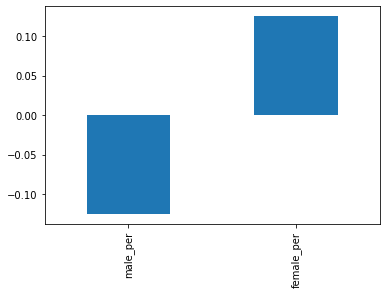

In [569]:
full.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

When Plotting SAT score vs. female percentage at every school, It looks like there is a sweet spot around 40% to 60% where female students perform the best.

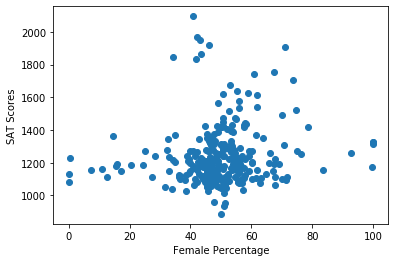

In [570]:
plot(full['female_per'], full['sat_score'], 'Female Percentage','SAT Scores' )

In [416]:
print(full[(full["female_per"] > 65) & (full["sat_score"] > 1400)]["School Name"])

26            PROFESSIONAL PERFORMING ARTS HIGH SCH
469                   ELEANOR ROOSEVELT HIGH SCHOOL
480                    TALENT UNLIMITED HIGH SCHOOL
495            FIORELLO H. LAGUARDIA HIGH SCHOOL OF
627                     TOWNSEND HARRIS HIGH SCHOOL
650    FRANK SINATRA SCHOOL OF THE ARTS HIGH SCHOOL
Name: School Name, dtype: object


Finally, schools' AP scores correlate very well with Schools' SAT scores. Below the top performer schools in NYC state.

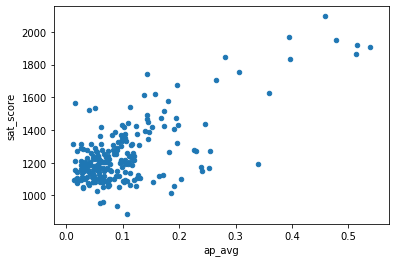

In [571]:
full["ap_avg"] = full["AP Test Takers "] / full["total_enrollment"]
full.plot.scatter(x='ap_avg', y='sat_score')

In [357]:
full[(full["ap_avg"] > .3) & (full["sat_score"] > 1700)]["School Name"]

469            ELEANOR ROOSEVELT HIGH SCHOOL
478                   STUYVESANT HIGH SCHOOL
547             BRONX HIGH SCHOOL OF SCIENCE
552    HIGH SCHOOL OF AMERICAN STUDIES AT LE
569           BROOKLYN TECHNICAL HIGH SCHOOL
627              TOWNSEND HARRIS HIGH SCHOOL
642    QUEENS HIGH SCHOOL FOR THE SCIENCES A
660      STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: School Name, dtype: object

## Summary

This data set is rich and useful material for A/B testing. However, the primary purpose of this project was to explore, clean, and unify the data to generate a master DataFrame that can be used further to perform data analysis.